<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-2629-1658478419/blob/main/IBM-Project-2629-1658478419/Project%20Development%20Phase/Sprint%201/RainfallPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATA** **COLLECTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler #use anything
from sklearn.decomposition import PCA #use anything 

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

###**DATA ANALYSIS**

Following table showcases the first 5 rows of the dataset with all 23 columns data.

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Table showcasing the last 5 rows with 23 columns of the dataset.

In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Displaying all the column names of the dataset

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.shape

(145460, 23)

This shows that the dataset contains of 145460 rows and 23 rows.

Displaying general information of the dataset like number of non-Null values, datatype.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Describing the dataset by displaying the general parameters like mean, standard deviation, minimum and maximum values.

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


###**DATA PRE-PROCESSING**

**To check if any column has null values and handle the same** <br>
*True :* null present <br>
*False:* non-null


In [ ]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

**Except Date and Location all other features have values missing:**<br><br>
*To replace all null values in each column with its mean value:*

In [ ]:
df[ "MinTemp"].fillna(df["MinTemp"].mean(),inplace=True)
df[ "MaxTemp"].fillna(df["MaxTemp"].mean(),inplace=True)
df[ "Rainfall"].fillna(df["Rainfall"].mean(),inplace=True)
df[ "Evaporation"].fillna(df["Evaporation"].mean(),inplace=True)
df[ "Sunshine"].fillna(df["Sunshine"].mean(),inplace=True)
df[ "Pressure9am"].fillna(df["Pressure9am"].mean(),inplace=True)
df[ "Pressure3pm"].fillna(df["Pressure3pm"].mean(),inplace=True)
df[ "Cloud9am"].fillna(df["Cloud9am"].mean(),inplace=True)
df[ "Cloud3pm"].fillna(df["Cloud3pm"].mean(),inplace=True)
df[ "Temp9am"].fillna(df["Temp9am"].mean(),inplace=True)
df[ "Temp3pm"].fillna(df["Temp3pm"].mean(),inplace=True)

*To replace all null values in each column with its mode value:*

In [ ]:
df[ "WindGustSpeed"].fillna(df["WindGustSpeed"].mode(),inplace=True)
df[ "WindSpeed9am"].fillna(df["WindSpeed9am"].mode(),inplace=True)
df[ "WindSpeed3pm"].fillna(df["WindSpeed3pm"].mode(),inplace=True)
df[ "Humidity9am"].fillna(df["Humidity9am"].mode(),inplace=True)
df[ "Humidity3pm"].fillna(df["Humidity3pm"].mode(),inplace=True)

*For string fields, replacing mode values: *

In [ ]:
print("Unique values in WindGustDir:",df.WindGustDir.unique())
print("Unique values in WindDir9am:",df.WindDir9am.unique())
print("Unique values in WindDir3pm:",df.WindDir3pm.unique())
print("Unique values in RainToday:",df.RainToday.unique())
print("Unique values in RainTomorrow:",df.RainTomorrow.unique())

Unique values in WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique values in WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique values in WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique values in RainToday: ['No' 'Yes' nan]
Unique values in RainTomorrow: ['No' 'Yes' nan]


In [ ]:
df[ "WindGustDir"].fillna(df["WindGustDir"].mode()[0],inplace=True)
df[ "WindDir9am"].fillna(df["WindDir9am"].mode()[0],inplace=True)
df[ "WindDir3pm"].fillna(df["WindDir3pm"].mode()[0],inplace=True)
df[ "RainToday"].fillna(df["RainToday"].mode()[0],inplace=True)
df[ "RainTomorrow"].fillna(df["RainTomorrow"].mode()[0],inplace=True)

*Checking for null values again:*<br>
(Should result in False)

In [ ]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

**To check for dependent and independent variables:**</br></br>
*All columns except RainToday and RainTomorrow, are independent varibles*

In [ ]:
X = df.iloc[:, :-2].values
print(X)

[['2008-12-01' 'Albury' 13.4 ... 4.509930082924903 16.9 21.8]
 ['2008-12-02' 'Albury' 7.4 ... 4.509930082924903 17.2 24.3]
 ['2008-12-03' 'Albury' 12.9 ... 2.0 21.0 23.2]
 ...
 ['2017-06-23' 'Uluru' 5.4 ... 4.509930082924903 12.5 26.1]
 ['2017-06-24' 'Uluru' 7.8 ... 2.0 15.1 26.0]
 ['2017-06-25' 'Uluru' 14.9 ... 8.0 15.0 20.9]]


*RainToday and Rain Tomorrow depend on the other columns like rainfall, wind_speed etc..*

In [ ]:
Y = df.iloc[:, -2].values
print(Y)

['No' 'No' 'No' ... 'No' 'No' 'No']


###**DATA VISUALIZATION**

### **Analyzing target values using pie chart**

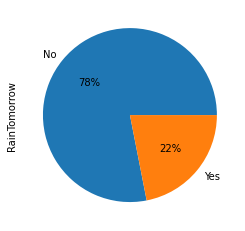

In [ ]:
df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%1.0f%%')

The target variable RainTomorrow returns two values, 'Yes' and 'No'.\
78% of result is 'Yes' and 22% is 'No'.\
This is an example of imbalanced classification, as we have uneven distribution of classes in the training dataset

### **Rainy Days by Location**

In [ ]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689
Albany,902
Albury,617
AliceSprings,244
BadgerysCreek,583


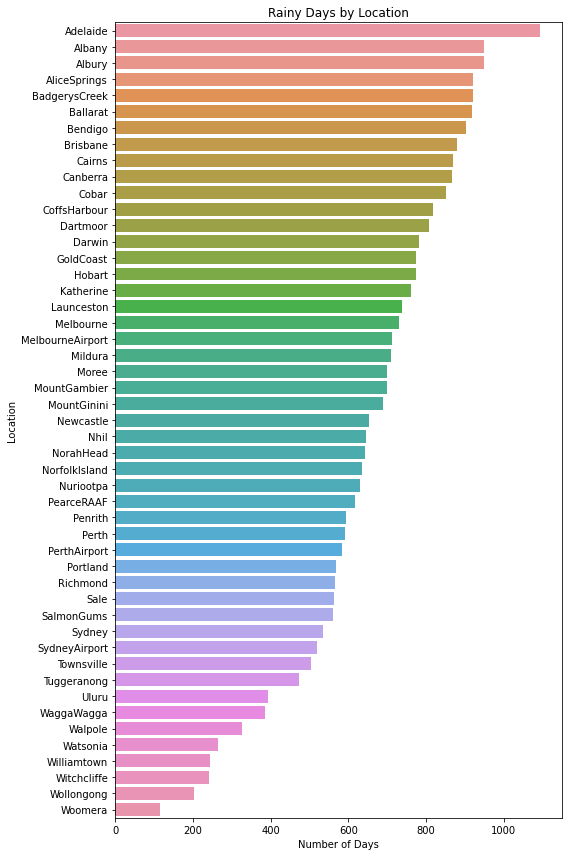

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

The above chart is useful for a quick check on the differences between locations with regard to the number of rainy days.

### **Visualizing minimum and maximum temperature using scatter plot**

In [ ]:
import plotly.express as px
px.scatter(df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           width=600, height=600,
           color='RainToday')

There is a linear positive correlation between minimum temperature and maximum temperature.

### **Visualizing Temperature and Humidity at 3pm**

In [ ]:
px.scatter(df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           width=600, height=600,
           color='RainTomorrow')

If the temperature today is low and humidity is high, it may rain tomorrow.\
If temperature today is high and humidity is low, it may not rain tomorrow

### **Correlation Matrix**

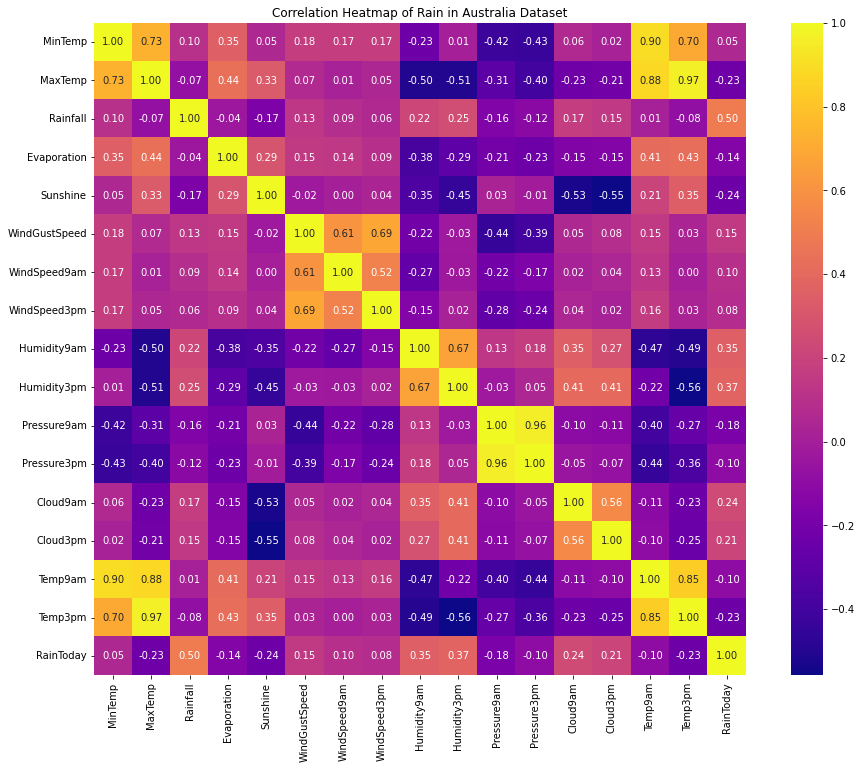

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='white', cmap='plasma')    
plt.title('Correlation Heatmap of Rain in Australia Dataset')
plt.show()

Several features have strong positive correlation\
MinTemp ~ MaxTemp (corr=0.73)\
MinTemp ~ Temp3pm (corr=0.70)\
MinTemp ~ Temp9am (corr=0.90)\
MaxTemp ~ Temp9am (corr=0.88)\
MaxTemp ~ Temp3pm (corr=0.97)\
WindGustSpeed ~ WindSpeed3pm (corr=0.69)\
Pressure9am ~ Pressure3pm (corr=0.96)\
Temp9am ~ Temp3pm (corr=0.85)

###**FEATURE SCALING**

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Initialise the Scaler
scaler = StandardScaler()
X = df.drop(['Date','Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)
#To scale data
scaler.fit(X)
print('StandardScaler()')


StandardScaler()


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [ ]:
print("Scaled values: ")
X

Scaled values: 


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.100000,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.700000,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.000000,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.300000,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
145456,3.6,25.300000,0.0,5.468232,7.611178,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
145457,5.4,26.900000,0.0,5.468232,7.611178,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1
145458,7.8,27.000000,0.0,5.468232,7.611178,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0


Min-Max Scaling is done by                                         
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min                                   where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.